In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS

%matplotlib inline
plt.style.use('ggplot')

In [2]:
!ls data/

AB_NYC_2019.csv    New_York_City_.png


In [364]:
df = pd.read_csv('data/AB_NYC_2019.csv')

In [365]:
df.shape

(48895, 16)

In [268]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [151]:
# According to the df.info(), some cloumns miss some values
# Double check
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [152]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Quikly visulize

In [153]:
#move the "price" column to the end
cols = df.columns.tolist()
cols

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [154]:
df = df.reindex(columns=['id',
         'name',
         'host_id',
         'host_name',
         'neighbourhood_group',
         'neighbourhood',
         'latitude',
         'longitude',
         'room_type',
         'minimum_nights',
         'number_of_reviews',
         'last_review',
         'reviews_per_month',
         'calculated_host_listings_count',
         'availability_365',
         'price'])

In [155]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,NaN,1,365,150
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,2018-11-19,0.10,1,0,80


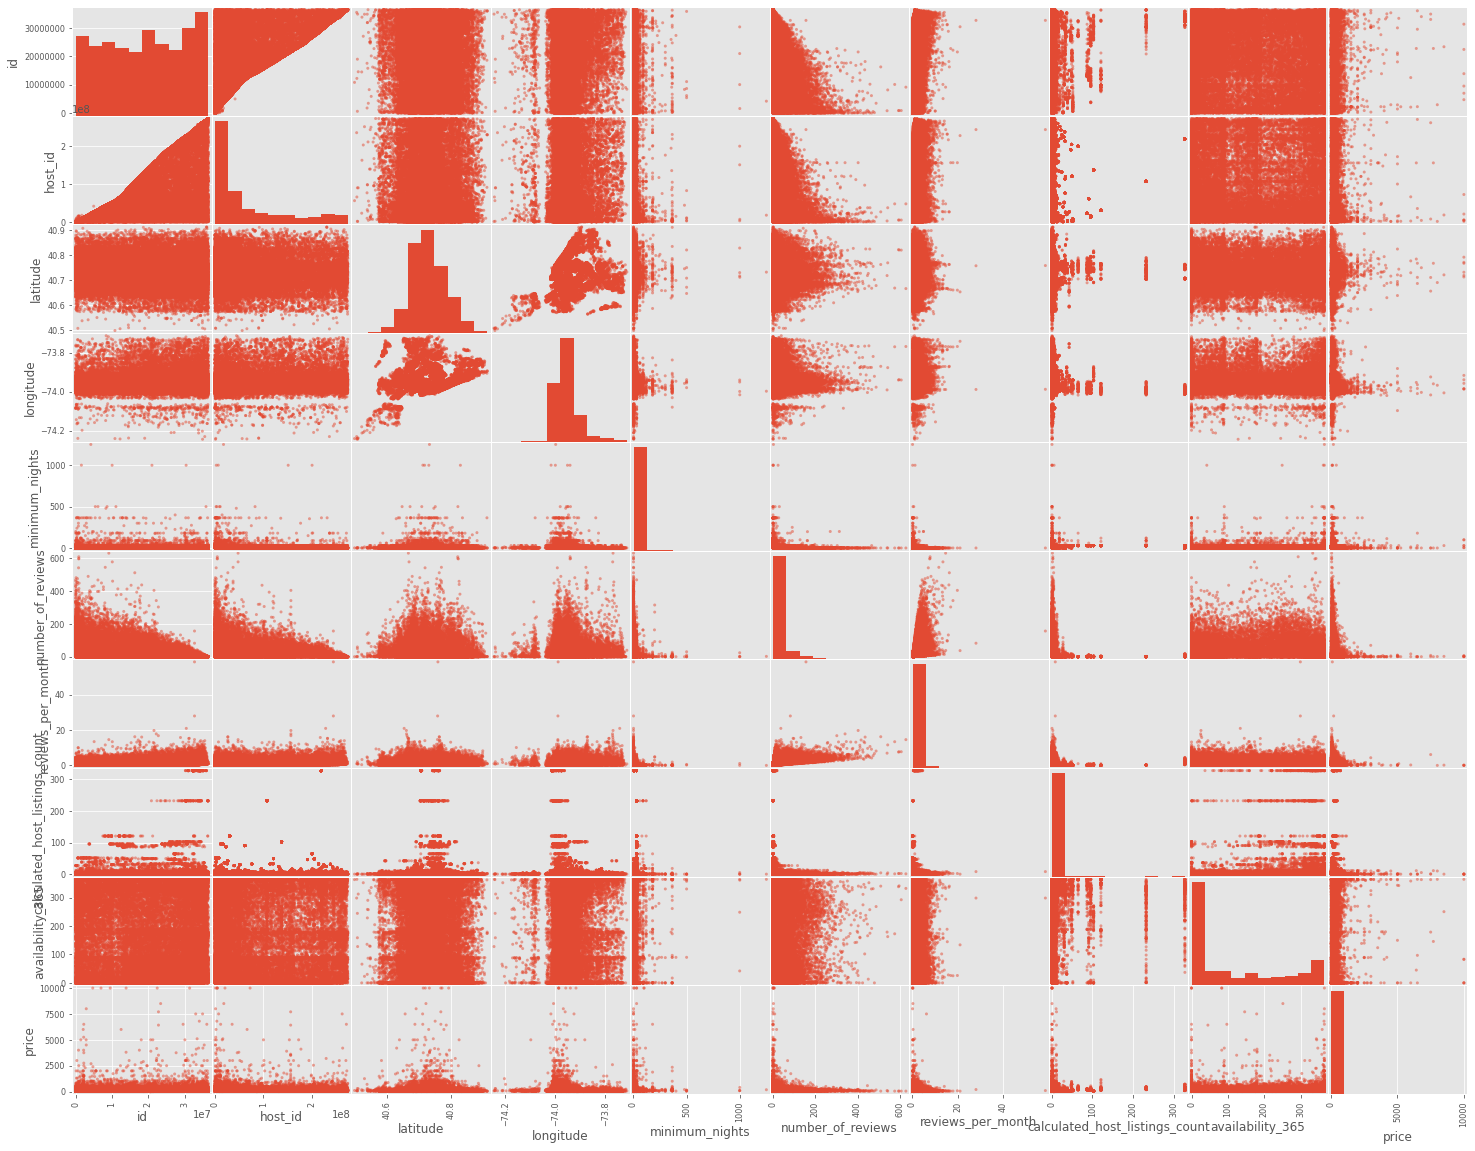

In [32]:
pd.plotting.scatter_matrix(df, figsize=(25, 20))
plt.show()

In [240]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19,0.21,6,365,149


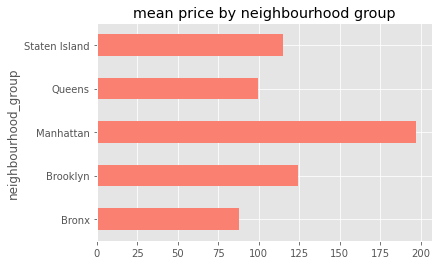

In [139]:
df.groupby('neighbourhood_group').mean()['price'].plot(kind='barh',color = 'salmon',title = 'mean price by neighbourhood group')
plt.savefig('mean_price_by_neighbourhood_group.png')

In [140]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

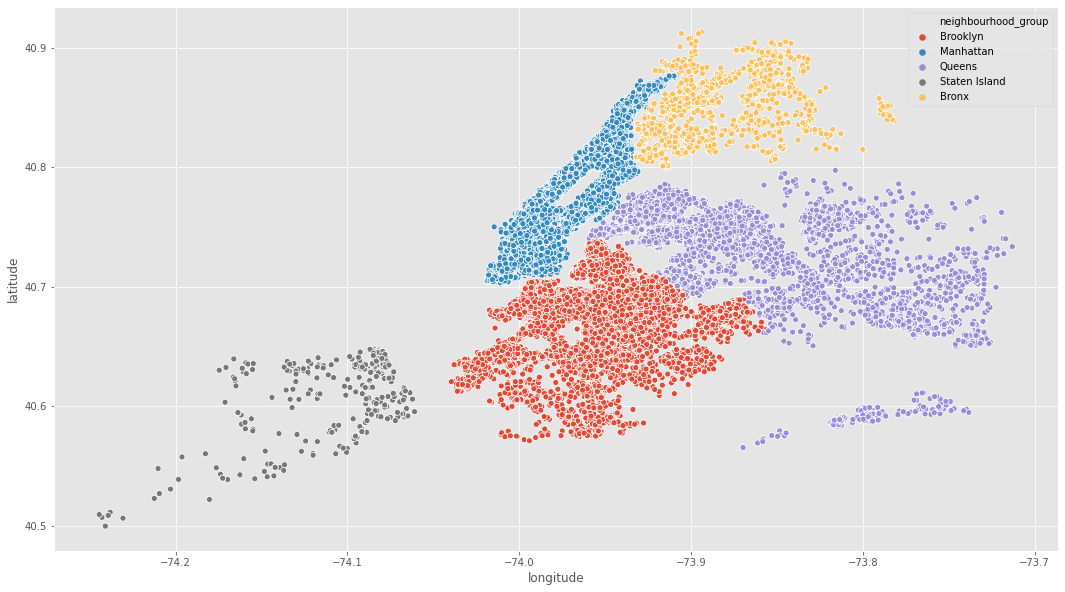

In [141]:
import seaborn as sns

NYC_img=plt.imread('data/New_York_City_.png', 0)
fig, ax = plt.subplots(figsize = (18,10))

ax = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group')
ax.legend()
plt.savefig('map_of_neighbourhood_group.png')


####  negative "room_type"

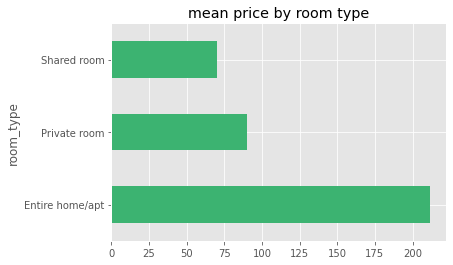

In [142]:
df.groupby('room_type').mean()['price'].plot(kind='barh', color ='mediumseagreen', title = 'mean price by room type')
plt.savefig('mean_price_by_room_type.png')

In [143]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

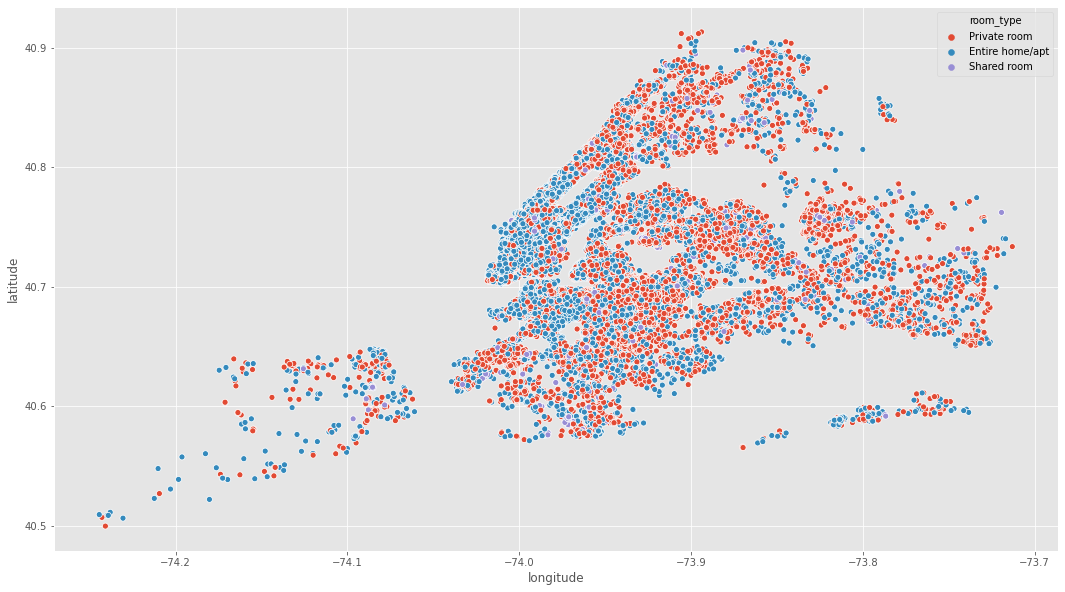

In [130]:
fig, ax = plt.subplots(figsize = (18,10))

ax = sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')
plt.savefig('map_of_room_type.png')

In [269]:
nbh_counts = df['neighbourhood'].value_counts()
nbh_counts

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Woodrow                  1
Willowbrook              1
New Dorp                 1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

In [287]:
# count number of neighbourhood that just have one host
(nbh_counts==1).sum()



6

In [291]:
# count number of neighbourhood that have more than 20 host
(nbh_counts>=20).sum()

130

In [290]:
nbh_counts.iloc[100]

42

####  negative "price"

In [273]:
price_mean=df['price'].mean()
price_mean

152.7206871868289

In [292]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

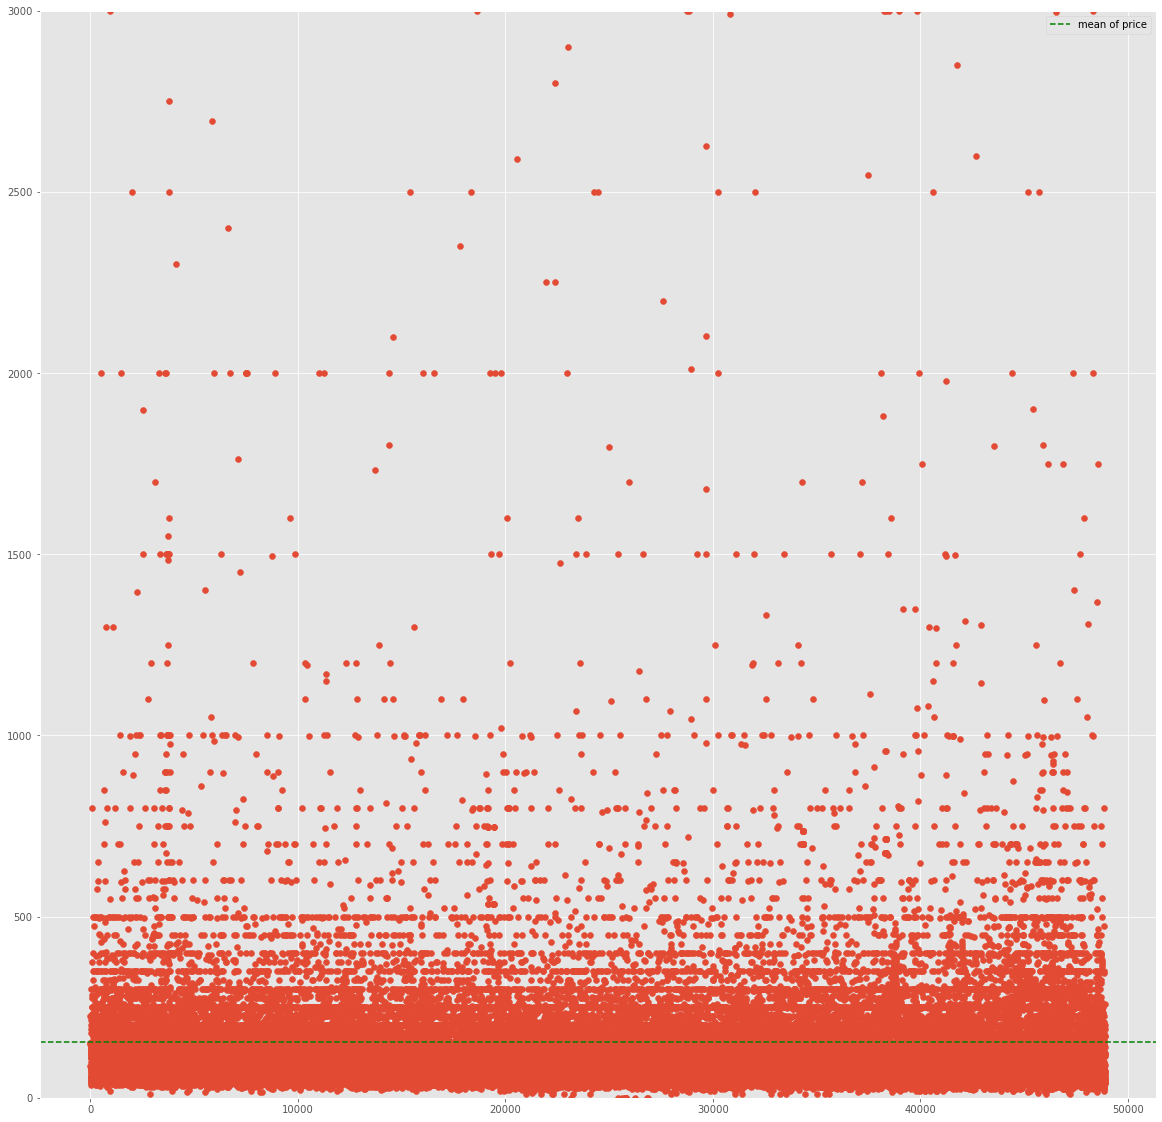

In [108]:
fig, ax = plt.subplots(figsize=(20,20))
price_mean
ax.scatter(x=df.index.tolist(), y=df.price)
ax.axhline(y=price_mean, color='green', linestyle='--',label ='mean of price')
ax.set_ylim(0, 3000)
ax.legend()

In [719]:
# the mean of price is 152.72, but the max price is 1000 that is not a reasonal price for me 
# drop same outliers of price

In [720]:
(df['price'] > 1000).sum()

239

In [721]:
(df['price'] <= 1000).sum()

48656

In [722]:
86+48793

48879

In [723]:
86/len(df['price'])

0.0017588710502096329

In [724]:
(df['price']==0).sum()

11

In [725]:
# drop the rows whose price is greater than 1000 and equal to 0
df1 = df[(df.price<= 1000) & (df['price']!=0)]


df1.shape

(48645, 16)

In [726]:
48895 - 48798 -11

86

In [727]:
df1.price.describe()

count    48645.000000
mean       141.311789
std        116.731330
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64

####  negative "minimum_nights"

In [728]:
df1.minimum_nights.describe()

count    48645.000000
mean         6.973461
std         20.267263
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

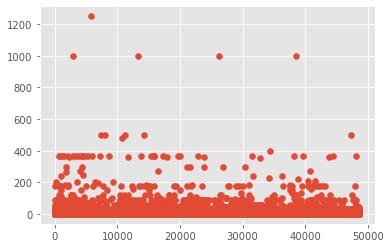

In [729]:
plt.scatter(np.arange(df1.shape[0]),df1.minimum_nights)

In [730]:
(df1['minimum_nights'] >=365).sum()

40

In [731]:
(df1['minimum_nights'] >=30).sum()

4451

#### The minimum night stay policy on Airbnb is the minimum number of nights that a guest can book a short-term vacation rental. 

In [732]:
#short-term stays means less than 30 nights at a time
#replace the df1['minimum_nights'] >30 with 30
df1.loc[(df1.minimum_nights >= 30),'minimum_nights']=30

/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [733]:
(df1['minimum_nights'] >30).sum()

0

In [734]:
df1.minimum_nights.describe()

count    48645.000000
mean         5.938020
std          8.653482
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         30.000000
Name: minimum_nights, dtype: float64

####  negative "calculated_host_listings_count"

In [735]:
df1.calculated_host_listings_count.describe()

count    48645.000000
mean         7.162545
std         33.026643
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

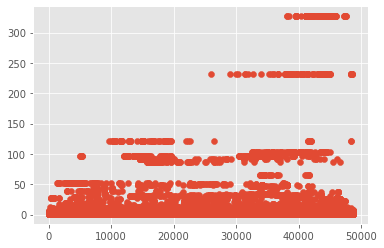

In [736]:
plt.scatter(np.arange(df1.shape[0]),df1.calculated_host_listings_count)

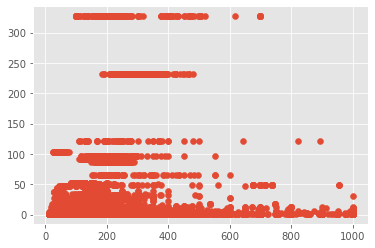

In [737]:
plt.scatter(df1.price,df1.calculated_host_listings_count)

#### negative "availability_365"

In [738]:
df1.availability_365.describe()

count    48645.000000
mean       112.442944
std        131.434828
min          0.000000
25%          0.000000
50%         44.000000
75%        226.000000
max        365.000000
Name: availability_365, dtype: float64

In [739]:
(df1['availability_365']==0).sum()

17463

(array([23514.,  3299.,  3229.,  1699.,  2710.,  1675.,  1912.,  2077.,
         2780.,  5750.]),
 array([  0. ,  36.5,  73. , 109.5, 146. , 182.5, 219. , 255.5, 292. ,
        328.5, 365. ]),
 <a list of 10 Patch objects>)

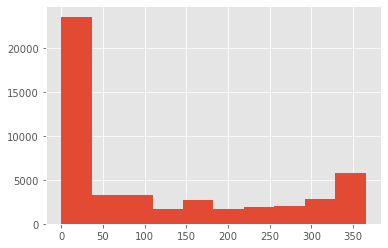

In [740]:
plt.hist(df1.availability_365)

#### Negative "name" 
create a WordCloud


In [741]:
stopwords = set(STOPWORDS) 
name_words = '' 
for val in df1.name: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    name_words += " ".join(tokens)+" "

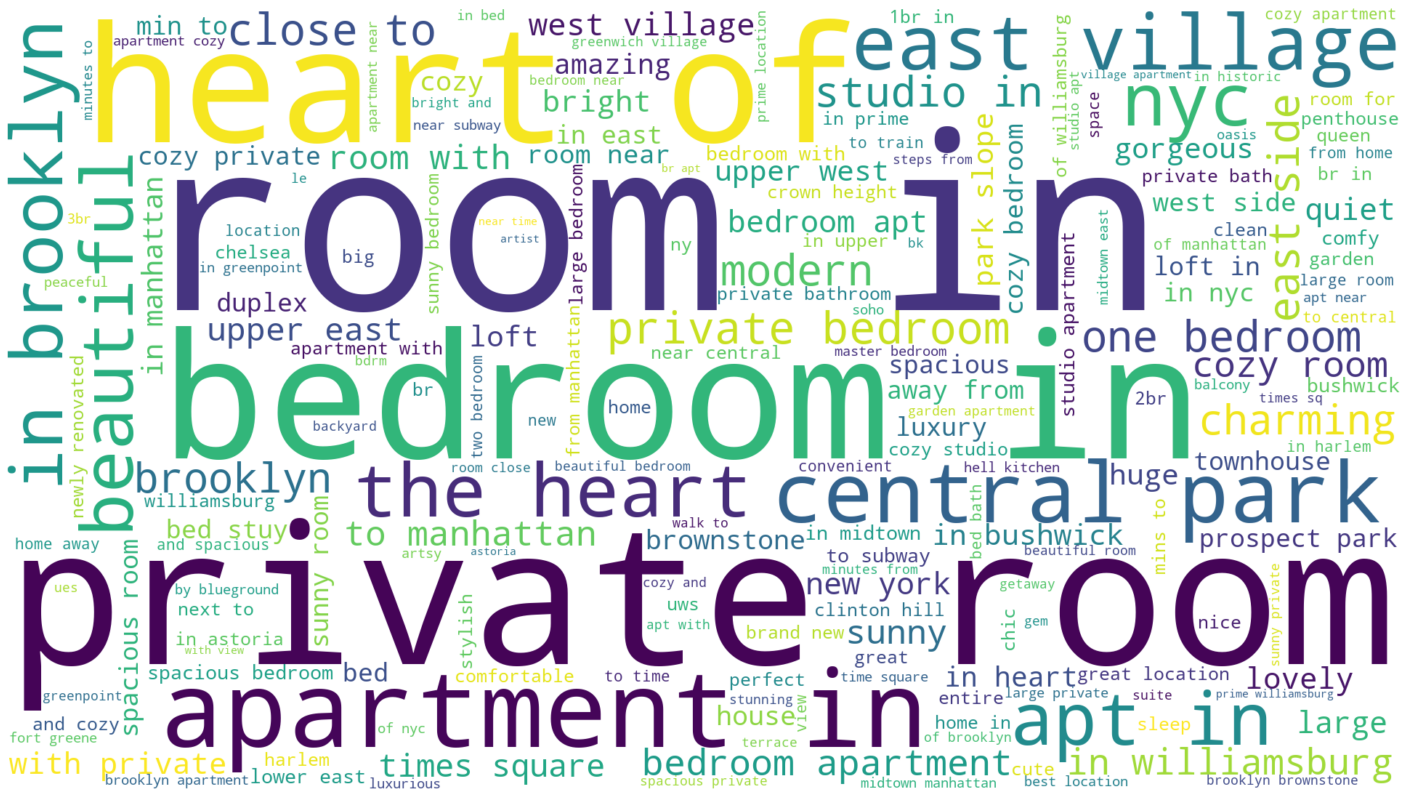

In [377]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080,
                          stopwords = stopwords 
                         ).generate(name_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('name_wordcloud.png')
plt.show()

In [742]:
df1['name_length'] = df1['name'].map(str).apply(len)

/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [743]:
df1.name_length.describe()

count    48645.000000
mean        36.898222
std         10.507578
min          1.000000
25%         31.000000
50%         36.000000
75%         46.000000
max        179.000000
Name: name_length, dtype: float64

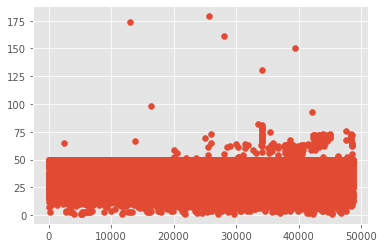

In [744]:
plt.scatter(np.arange(df1.shape[0]),df1.name_length)

In [745]:
#more than 75% name length smaller than 50
#replace the df1['minimum_nights'] >50 with 50
df1.loc[(df1.name_length > 50),'name_length']=50
df1.name_length.describe()

count    48645.000000
mean        36.803885
std         10.264577
min          1.000000
25%         31.000000
50%         36.000000
75%         46.000000
max         50.000000
Name: name_length, dtype: float64

### Data Preprocessing

#### replace the null values

In [746]:
# Rreplace the 'reviews per month' by zero


In [747]:
df1['reviews_per_month'].isnull().sum()

9919

In [748]:
df1['reviews_per_month'].fillna(value =0,inplace=True)

/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [749]:
df1['reviews_per_month'].isnull().sum()

0

In [750]:
print(df1['host_name'].isnull().sum())

21


In [751]:
# Rreplace the 'host_name' by ' '
print(df1['host_name'].isnull().sum())
df1['host_name'].fillna(value ='nan',inplace=True)

df1['host_name'].isnull().sum()      

21


0

In [752]:
print(df1.shape)

(48645, 17)


In [753]:
df1 = df1[df1['name'].notna()]
print(df1.shape)
df1['name'].isnull().sum()

(48629, 17)


0

#### prepare the data for model

In [754]:
df1=df1.reset_index(drop=True)

In [755]:
columns = df1.columns.tolist()
columns

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'name_length']

In [756]:
num_cls = [ 'minimum_nights',
             'number_of_reviews','reviews_per_month',
             'calculated_host_listings_count',
             'availability_365','name_length',
             'price']
cat_groups = ['room_type','neighbourhood_group','neighbourhood']
prefixs = ['room_type','nb_g','nb']
# cat_groups = ['neighbourhood_group','room_type']

In [757]:
def process_product_group(df,cls,groups,prefixs):
    """
    feature engineering:
        load numeric values
        get dummies on categorical
    """
    processed_df = df[cls]
    
    for i, group in enumerate(groups):
    #Get the Dummy variables
        dummies = pd.get_dummies(df[group], prefix=prefixs[i],drop_first = True)
        processed_df = processed_df.join(dummies)
    return processed_df

In [758]:
df1.price.describe()

count    48629.000000
mean       141.309712
std        116.736721
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64

In [759]:
processed_df = process_product_group(df1,num_cls,cat_groups,prefixs)

In [760]:
processed_df.price.describe()

count    48629.000000
mean       141.309712
std        116.736721
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64

In [761]:
print(processed_df.shape)
processed_df.info()

(48629, 233)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48629 entries, 0 to 48628
Columns: 233 entries, minimum_nights to nb_Woodside
dtypes: float64(1), int64(6), uint8(226)
memory usage: 13.1 MB


In [762]:
processed_df.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_length,price,room_type_Private room,room_type_Shared room,nb_g_Brooklyn,...,nb_Westerleigh,nb_Whitestone,nb_Williamsbridge,nb_Williamsburg,nb_Willowbrook,nb_Windsor Terrace,nb_Woodhaven,nb_Woodlawn,nb_Woodrow,nb_Woodside
0,1,9,0.21,6,365,34,149,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,45,0.38,2,355,21,225,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0.00,1,365,35,150,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,270,4.64,1,194,31,89,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10,9,0.10,1,0,48,80,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [763]:
# write the processed dataframe to csv
processed_df.to_csv('data/processed_data.csv',index =None)

In [764]:
processed_v2 = processed_df.copy()
print(processed_v2.shape)
processed_v2.info()

(48629, 233)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48629 entries, 0 to 48628
Columns: 233 entries, minimum_nights to nb_Woodside
dtypes: float64(1), int64(6), uint8(226)
memory usage: 13.1 MB


In [765]:
processed_v2.pop('calculated_host_listings_count')


0        6
1        2
2        1
3        1
4        1
        ..
48624    2
48625    2
48626    1
48627    6
48628    1
Name: calculated_host_listings_count, Length: 48629, dtype: int64

In [766]:
processed_v2.pop('number_of_reviews')

0          9
1         45
2          0
3        270
4          9
        ... 
48624      0
48625      0
48626      0
48627      0
48628      0
Name: number_of_reviews, Length: 48629, dtype: int64

In [767]:
print(processed_v2.shape)
processed_v2.info()

(48629, 231)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48629 entries, 0 to 48628
Columns: 231 entries, minimum_nights to nb_Woodside
dtypes: float64(1), int64(4), uint8(226)
memory usage: 12.3 MB


In [768]:
processed_v2.to_csv('data/processed_V2.csv',index =None)

In [769]:
df2 = pd.read_csv('data/processed_v2.csv')
df2.shape

(48629, 231)

In [770]:
df2.price.describe()

count    48629.000000
mean       141.309712
std        116.736721
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64

In [771]:
df2.head()

,minimum_nights,reviews_per_month,availability_365,name_length,price,room_type_Private room,room_type_Shared room,nb_g_Brooklyn,nb_g_Manhattan,nb_g_Queens,...,nb_Westerleigh,nb_Whitestone,nb_Williamsbridge,nb_Williamsburg,nb_Willowbrook,nb_Windsor Terrace,nb_Woodhaven,nb_Woodlawn,nb_Woodrow,nb_Woodside
0,1,0.21,365,34,149,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.38,355,21,225,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.00,365,35,150,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4.64,194,31,89,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0.10,0,48,80,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [772]:
df2['log_price'] = np.log(df1.price)

In [774]:
# plt.scatter(x = df2.number_of_reviews, y = df2.price)

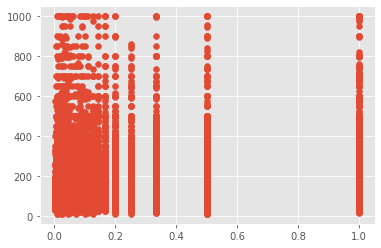

In [775]:
plt.scatter(x = 1/df1.number_of_reviews, y = df1.price)

In [776]:
keep_columns = num_cls.copy()
keep_columns.extend(cat_groups)
keep_columns

['minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'name_length',
 'price',
 'room_type',
 'neighbourhood_group',
 'neighbourhood']

In [777]:
df_keep_columns = df1[keep_columns]
df_keep_columns.shape

(48629, 10)

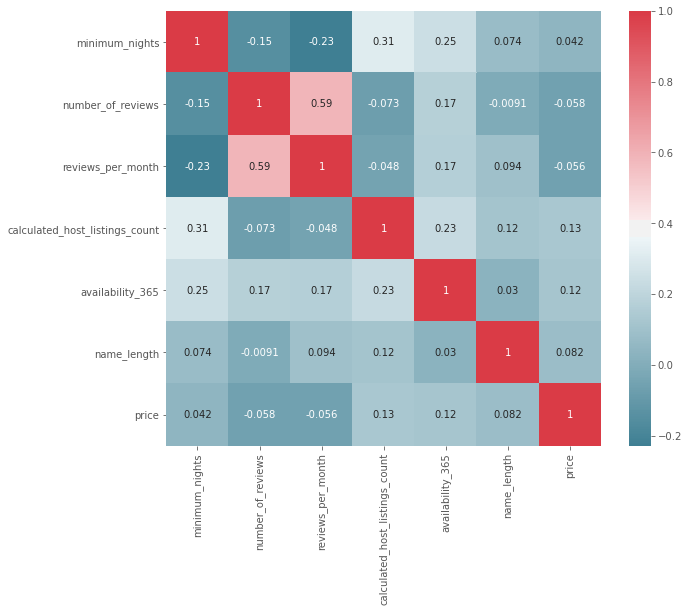

In [779]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
corr = df_keep_columns.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.savefig('images/correlation_matrix.png')